<a href="https://colab.research.google.com/github/VladimrIlicheff/DZ1/blob/master/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B9_%D0%BF%D0%BE_%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B0%D0%BC_(Terra_AI_dataset_%2B_Autokeras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 Тут довольно много излишних блоков кода, можно их и убрать. Я их вставлял скорее для собственной прооверки.

In [1]:
from google.colab import drive  # для работы с Google Drive
import numpy as np              # для работы с массивами данных
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import random
import cv2
%matplotlib inline

In [ ]:
!pip install gdown
import gdown
url = 'https://drive.google.com/uc?id=1ntHWBFCa3lT25VKiW5pSuGzxu58Voi17'
output = 'foto.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1ntHWBFCa3lT25VKiW5pSuGzxu58Voi17
From (redirected): https://drive.google.com/uc?id=1ntHWBFCa3lT25VKiW5pSuGzxu58Voi17&confirm=t&uuid=d93ffa1c-c9b4-432a-88a9-0b8c5b5eba03
To: /content/foto.zip
100%|██████████| 222M/222M [00:01<00:00, 132MB/s]


'foto.zip'

In [ ]:
!unzip -qo "foto.zip" -d foto/
# Папка с папками картинок, рассортированных по категориям

In [ ]:
os.mkdir('/content/foto/norma_axial')
os.mkdir('/content/foto/norma_coronal')
os.mkdir('/content/foto/norma_sagittal')
os.mkdir('/content/foto/patlogia_axial')
os.mkdir('/content/foto/patlogia_coronal')
os.mkdir('/content/foto/patlogia_sagittal')

In [ ]:
folders = [
    {'source': '/content/foto/Норма и патология по 10 файлов/норма/Axial', 'target': '/content/foto/norma_axial'},
    {'source': '/content/foto/Норма и патология по 10 файлов/норма/Coronal', 'target': '/content/foto/norma_coronal'},
    {'source': '/content/foto/Норма и патология по 10 файлов/норма/Sagittal', 'target': '/content/foto/norma_sagittal'},
    {'source': '/content/foto/Норма и патология по 10 файлов/Латерально/Axial', 'target': '/content/foto/patlogia_axial'},
    {'source': '/content/foto/Норма и патология по 10 файлов/Латерально/Coronal', 'target': '/content/foto/patlogia_coronal'},
    {'source': '/content/foto/Норма и патология по 10 файлов/дистально/sagittal', 'target': '/content/foto/patlogia_sagittal'},
    {'source': '/content/foto/Норма и патология по 10 файлов/дистракция/sagittal', 'target': '/content/foto/patlogia_sagittal'},
    {'source': '/content/foto/Норма и патология по 10 файлов/компрессия/sagittal', 'target': '/content/foto/patlogia_sagittal'},
    {'source': '/content/foto/Норма и патология по 10 файлов/мезиально/sagittal', 'target': '/content/foto/patlogia_sagittal'},
    {'source': '/content/foto/Норма и патология по 10 файлов/медиально/axial', 'target': '/content/foto/norma_axial'},
    {'source': '/content/foto/Норма и патология по 10 файлов/медиально/coronal', 'target': '/content/foto/norma_coronal'},
]
for folder in folders:
    files = os.listdir(folder['source'])
    for file in files:
        source_path = os.path.join(folder['source'], file)
        target_path = os.path.join(folder['target'], file)
        os.rename(source_path, target_path)

In [ ]:
#удаляем папку
import shutil
folder_path = '/content/foto/Норма и патология по 10 файлов'
shutil.rmtree(folder_path)

In [ ]:
IMAGE_PATH = '/content/foto'
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))
# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)
# Проверяем результат
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 6, метки классов: ['norma_axial', 'norma_coronal', 'norma_sagittal', 'patlogia_axial', 'patlogia_coronal', 'patlogia_sagittal']


In [ ]:
for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}/{cls}'))

norma_axial : ['К104Ла чис.png', 'К151Ла чис.png', 'К104Ла.png', 'К138Па чис.png', 'К13Па чис.png', 'К138Па.png', 'К137Па чис.png', 'К104Па.png', 'К151Ла.png', 'К137Па.png', 'К104Па чис.png', 'К137Ла чис.png', 'К151Па чис.png', 'К185Па чис.png', 'К151Па.png', 'К137Ла.png', 'К185Па.png', 'К13Па.png']
norma_coronal : ['К104Лк.png', 'К13Лк чис.png', 'К138Пк чис.png', 'К151Лк.png', 'К104Пк чис.png', 'К151Пк чис.png', 'К137Лк чис.png', 'К137Пк чис.png', 'К13Лк.png', 'К104Лк чис.png', 'К138Пк.png', 'К137Пк.png', 'К185Пк чис.png', 'К151Пк.png', 'К137Лк.png', 'К104Пк.png', 'К185Пк.png', 'К151Лк чис.png']
norma_sagittal : ['К13Лс.png', 'К104Лс чис.png', 'К13Лс чис.png', 'К185Пс.png', 'К185Пс чис.png', 'К104Лс.png', 'К104Пс.png', 'К104Пс чис.png']
patlogia_axial : ['К171Па чис.png', 'К175Па чис.png', 'К10Ла чис.png', 'К10Ла.png', 'К10Па чис.png', 'К175Ла чис.png', 'К175Ла.png', 'К171Ла.png', 'К175Па.png', 'К171Па.png', 'К10Па.png', 'К171Ла чис.png']
patlogia_coronal : ['К175Пк.png', 'К171Лк.png'

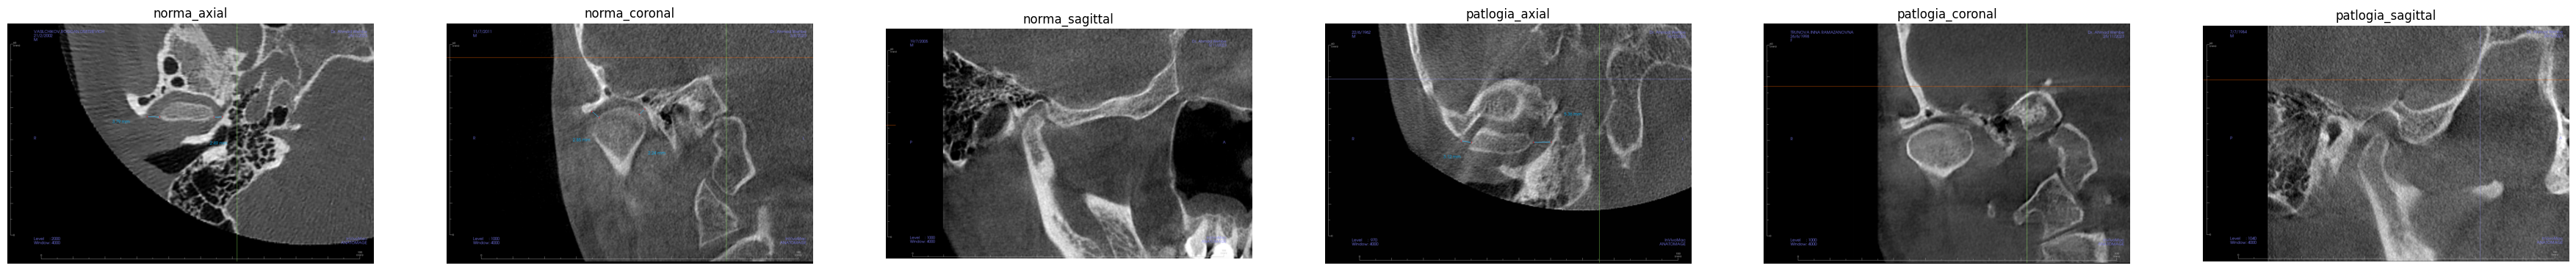

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(45, 10))
for i in range(CLASS_COUNT):
    sagittal_path = f'{IMAGE_PATH}/{CLASS_LIST[i]}/'
    img_path = sagittal_path + random.choice(os.listdir(sagittal_path))
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')
plt.show()

In [ ]:
!pip -q install autokeras
!pip -q install terra-ai-datasets-framework
from terra_ai_datasets.create import ImageClassification
import autokeras as ak

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using TensorFlow backend


In [ ]:
dataset = ImageClassification(
    source_path=['/content/foto/patlogia_sagittal','/content/foto/patlogia_coronal','/content/foto/patlogia_axial','/content/foto/norma_sagittal','/content/foto/norma_axial','/content/foto/norma_coronal'], # cписок относительных путей до папок с изображениями
    width=128,                       # ширина изображения
    height=128,                      # высота изображения
    preprocessing='None',            # выбор скейлера. Варианты: "None", "MinMaxScaler", "TerraImageScaler"
    network="Convolutional",         # постобработка массивов под определенный вид нейронной сети. Варианты: "Convolutional", "Linear"
    process='Stretch',               # метод обработки изображений при изменении размерности. Варианты: "Stretch", "Fit", "Cut"
    train_size=0.8,                  # соотношение обучающей выборки к валидационной
    one_hot_encoding=False,          # перевод Y массивов в формат One-Hot Encoding
    augmentation="Light",            # параметр для аугментации изображений
    augmentation_coef=0.8            # параметр для аугментации изображений
    )

13:36:55 | Датасет подготовлен к началу формирования массивов
INFO:terra_ai_datasets.creation.utils:Датасет подготовлен к началу формирования массивов


In [ ]:
dataset.dataframe['train']

,1_Image,2_Classification
0,/content/foto/norma_coronal/К137Пк.png,norma_coronal
1,/content/foto/norma_coronal/К13Лк.png;augm,norma_coronal
2,/content/foto/norma_axial/К151Ла чис.png;augm,norma_axial
3,/content/foto/norma_sagittal/К104Лс чис.png;augm,norma_sagittal
4,/content/foto/patlogia_axial/К171Ла.png;augm,patlogia_axial
...,...,...
139,/content/foto/norma_axial/К137Па чис.png,norma_axial
140,/content/foto/norma_coronal/К104Пк чис.png,norma_coronal
141,/content/foto/patlogia_sagittal/К253Пс чис.png,patlogia_sagittal
142,/content/foto/patlogia_coronal/К175Лк чис.png,patlogia_coronal


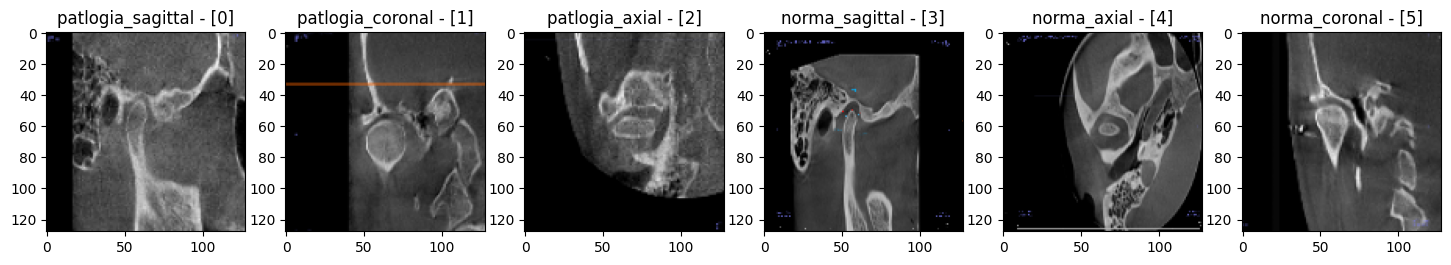

In [ ]:
dataset.visualize()

In [ ]:
dataset.summary()

,1_Image,2_Classification
0,/content/foto/norma_coronal/К137Пк.png,norma_coronal
1,/content/foto/norma_coronal/К13Лк.png;augm,norma_coronal
2,/content/foto/norma_axial/К151Ла чис.png;augm,norma_axial
3,/content/foto/norma_sagittal/К104Лс чис.png;augm,norma_sagittal
4,/content/foto/patlogia_axial/К171Ла.png;augm,patlogia_axial



Кол-во примеров в train выборке: 144
Кол-во примеров в val выборке: 20

Список классов и количество примеров:


,patlogia_sagittal,patlogia_coronal,patlogia_axial,norma_sagittal,norma_axial,norma_coronal
train,42,20,16,12,25,29
val,9,2,3,1,4,1


In [ ]:
dataset.create(use_generator=False, verbose=1)

13:37:14 | Формирование массивов train - Image - 1_Image: 100%|██████████| 144/144 [00:15<00:00,  9.44it/s]
13:37:30 | Формирование массивов train - Classification - 2_Classification: 100%|██████████| 144/144 [00:00<00:00, 9420.70it/s]
13:37:31 | Формирование массивов val - Image - 1_Image: 100%|██████████| 20/20 [00:02<00:00,  8.58it/s]
13:37:33 | Формирование массивов val - Classification - 2_Classification: 100%|██████████| 20/20 [00:00<00:00, 2185.33it/s]


In [ ]:
input_node = ak.ImageInput()
output_node = ak.ImageBlock(
    block_type="vanilla",
    normalize=True,
    augment=False,
)(input_node)
output_node = ak.ClassificationHead()(output_node)

clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=10,
    objective='val_accuracy')

In [ ]:
clf.fit(
        dataset.dataset['train'].batch(128),
        epochs=10,
        validation_data=dataset.dataset['val'].batch(128),
    )

Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.949999988079071

Best val_accuracy So Far: 0.949999988079071
Total elapsed time: 00h 01m 12s
Epoch 1/10
2/2 [==============================] - 2s 289ms/step - loss: 1.8514 - accuracy: 0.2292 - val_loss: 1.2501 - val_accuracy: 0.6500
Epoch 2/10
2/2 [==============================] - 0s 109ms/step - loss: 1.4086 - accuracy: 0.5417 - val_loss: 1.1848 - val_accuracy: 0.9000
Epoch 3/10
2/2 [==============================] - 0s 113ms/step - loss: 1.2187 - accuracy: 0.6250 - val_loss: 0.8403 - val_accuracy: 0.6500
Epoch 4/10
2/2 [==============================] - 0s 103ms/step - loss: 0.9025 - accuracy: 0.6319 - val_loss: 0.7077 - val_accuracy: 0.7500
Epoch 5/10
2/2 [==============================] - 0s 106ms/step - loss: 0.6208 - accuracy: 0.7917 - val_loss: 0.5827 - val_accuracy: 0.7500
Epoch 6/10
2/2 [==============================] - 0s 100ms/step - loss: 0.4089 - accuracy: 0.8542 - val_loss: 0.5176 - val_accuracy: 0.7500
Epoch 7/10
2/2 [===

In [ ]:
model = clf.export_model()
model.save('model_2.keras')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 4)]     0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 128, 128, 4)       0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 128, 128, 4)       9         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      1184      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0     